# Neural Networks

## What is Artificial Neural Newtork?
- Predictive model inspired by functioning of <u>neurons in brain</u>.
- an artificial neuron (also known as a "node") receives multiple inputs, applies weights to them, sums them, and then passes the sum through an <u>activation function</u>.
- If the result <u>exceeds a certain threshold</u>, the neuron "fires" (produces an output), otherwise, it doesn't.
- Neural networks are **organized into layers**, typically with an <u>input layer</u>, one or more <u>hidden layers</u>, and an <u>output layer</u>.

## Applications of ANN?
1. **Image Recognition**: Neural networks can identify objects and patterns in images, making them useful for facial recognition, handwriting analysis, and medical imaging.
2. **Natural Language Processing (NLP)**: ANNs can process and understand text, enabling applications like language translation, sentiment analysis, and text generation.
3. **Speech Recognition**: Neural networks are employed in speech-to-text applications and voice-activated systems.

## Challenges in NN?
1. **Black box nature**
   > Their internal workings are complex and not easily interpretable.  
   > This lack of transparency can be a drawback in applications where explainability is crucial.

2. **Training Complexity**
   >Training large neural networks requires significant computational resources, large datasets, and careful tuning of hyperparameters.  
   >This can make it challenging to achieve optimal results.  

3. **Overfitting**
    > NNs, especially deep ones, are prone to overfitting if not managed properly.  
    > Techniques like regularization, dropout, and early stopping are used to mitigate this risk.

4. **Data Requirements**
   > NNs typically require large datasets for training.  
   > Smaller datasets may not provide enough information to train the network effectively.


# 1. Perceptrons

## (a) Basics of Perceptron
- Mimics a single neuron
- Structure of perceptron:
  > - Inputs: Represent features or data points.
  > - Weights: Associated to each input, which indicates the importance or contribution of that input.
  > - Bias: An additional constant term that adjusts the output.
  > - Activation Function: A function that **applies a threshold** to the <u>weighted sum of the inputs</u> to determine the final output.

- Example:  
Suppose you have a perceptron that decides whether you should carry an umbrella based on two factors:
1. temperature and
2. whether it's cloudy  

Temperature: If it's cold, you might need an umbrella because it could rain or snow.  
Cloudiness: If it's cloudy, there's a higher chance of rain.  

Let's say the perceptron assigns weights to these inputs:  

> - Weight for Temperature: -0.5 (colder temperature is more likely to need an umbrella).
> - Weight for Cloudiness: 0.7 (more clouds mean a higher chance of rain).
  
Decision-Making

> - Weighted Sum: The perceptron calculates the weighted sum of the inputs. If temperature is 10 degrees and cloudiness is 1 (yes), the weighted sum would be:
    $$Weighted\_Sum = (10×-0.5)+(1×0.7)=−5+0.7=−4.3$$
    $$Weighted\_ Sum=(10×−0.5)+(1×0.7)=−5+0.7=−4.3$$

> - Activation Function: The perceptron applies a threshold (like 0) to determine if it should carry an umbrella:

> If the weighted sum is greater than or equal to 0, the perceptron outputs "yes."  
> If the weighted sum is less than 0, it outputs "no."  

In this case, because the weighted sum is -4.3, the output is "no" (no umbrella).


## (b) Perceptron coding

1. Create a Threshold 
   - A **step function**, which outputs 1 if input >=0, else 0
   - also called **Heaviside function**
  
2. Create an Activation function: perceptron_output
   - It will give output based on threshold applied on weighted sum of inputs to perceptron

In [1]:
# Threshold 

def step_function(x: float) -> float:
    return 1.0 if x>=0 else 0.0

assert step_function(-1) == 0
assert step_function(1) == 1
assert step_function(0) == 1

In [2]:
# Activation Function
from scratch.linear_algebra import Vector, dot

def perceptron_output(weights: Vector, bias: float, x: Vector) -> float:
    weighted_sum = dot(weights, x) + bias
    return step_function(weighted_sum)


In [3]:
# Example

xs = [10, 1] # Temp(degrees) and cloudiness(yes/no)
weight = [-0.5, 0.7]
assert perceptron_output(weight, 0, xs) == 0 # no umbrella

## Hyperplane and perceptron

- We can say, Perceptron separates the inputs based on half-spaces created by hyperplane.

  Hyperplane is defined as:
  $$ dot (weights, x) + bias == 0 $$

- Let's plot a hyperplane
  

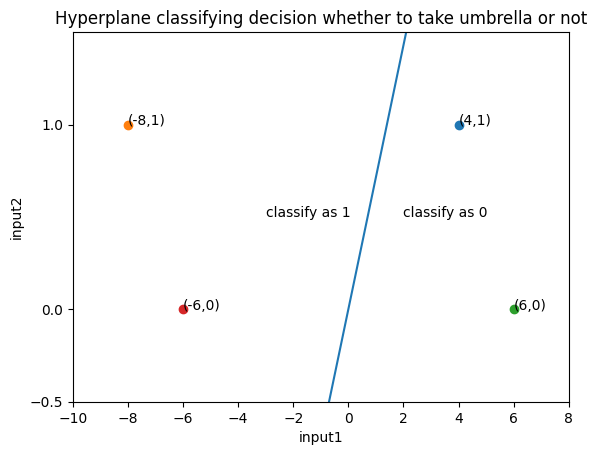

In [4]:
from matplotlib import pyplot as plt

x1 = [x for x in range(-10,15)]
x2 = [(5/7) * x for x in x1]

plt.plot(x1, x2)
plt.xlabel('input1')
plt.ylabel('input2')
plt.title('Hyperplane classifying decision whether to take umbrella or not')

plt.xlim(-10,8) 
plt.ylim(0,1.5)
plt.yticks([-.5,0,1])

points = [(4,1), (-8,1), (6,0), (-6,0)]
point_labels = ['(4,1)', '(-8,1)', '(6,0)', '(-6,0)']

for point, label in zip(points, point_labels):
    plt.scatter(*point) # unzip tuple to plot x1, x2 points
    plt.text(*point, label)

plt.text(2,0.5,'classify as 0')
plt.text(-3,0.5,'classify as 1')

assert perceptron_output(weight, 0, [4,1]) == 0 # temp is 4 degrees and cloudy = no umbrella
assert perceptron_output(weight, 0, [-8,1]) == 1 # temp is -8 and cloudy = take umbrella
assert perceptron_output(weight, 0, [6, 0]) == 0 # temp is 6 and not cloudy = no umbrella
assert perceptron_output(weight, 0, [-6, 0]) == 1 # temp is -6 and not cloudy = take umbrella

### 1. AND gate using Perceptron  

In [5]:
and_weight = [2.,2.] 
and_bias = -3 
assert perceptron_output(and_weight, and_bias, [1,1]) == 1
assert perceptron_output(and_weight, and_bias, [1,0]) == 0
assert perceptron_output(and_weight, and_bias, [0,1]) == 0
assert perceptron_output(and_weight, and_bias, [0,0]) == 0

### 2. OR gate using Perceptron

In [6]:
or_weight = [2.,2.]
or_bias = -1

assert perceptron_output(or_weight, or_bias, [0,0]) == 0
assert perceptron_output(or_weight, or_bias, [0,1]) == 1
assert perceptron_output(or_weight, or_bias, [1,0]) == 1
assert perceptron_output(or_weight, or_bias, [1,1]) == 1

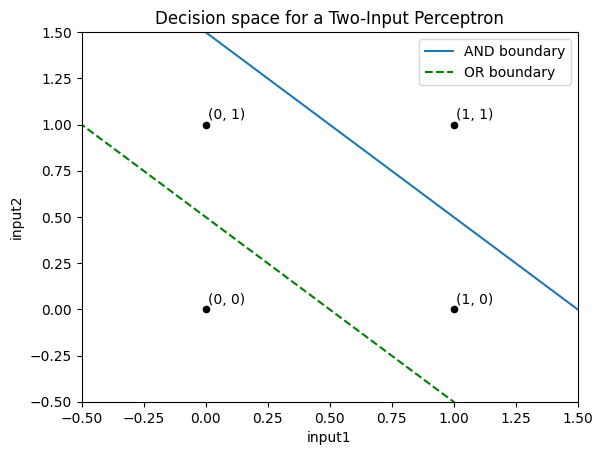

In [7]:
x1_and = [x/3 for x in range(-10,10)]
x2_and = [(3-2*x)/2 for x in x1_and]
plt.plot(x1_and, x2_and, label= 'AND boundary')

x1_or = [x/3 for x in range(-10,10)]
x2_or = [(1-2*x)/2 for x in x1_and]
plt.plot(x1_or,x2_or, label = 'OR boundary',linestyle = 'dashed', color = 'green')

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.legend()
plt.xlabel('input1')
plt.ylabel('input2')
plt.title('Decision space for a Two-Input Perceptron')

points = [(0,0), (0,1), (1,0), (1,1)]
for point in points:
    x,y = point
    plt.scatter(x, y, color = 'black', s=20)
    plt.text(x+0.01, y+0.03, point)

### 3. NOT gate using perceptron

- has only one input

In [8]:
not_weight = [-2.]
not_bias = 1.

assert perceptron_output(not_weight,not_bias,[1]) == 0
assert perceptron_output(not_weight,not_bias,[0]) == 1

### 4. XOR gate 

- Not possible using a single perceptron
- We need more complicated neural network
- Of course, we don’t need to approximate a neuron in order to build a logic gate, which is directly:

In [9]:
and_gate = min
or_gate = max
xor_gate = lambda x, y: 0 if x == y else 1

# 2. Feed-Forward Neural Networks

- Idealized representation of the brain's topology, consisting of discrete layers of neurons
  
- Neurons in each layer are connected to those in the next layer, creating a forward flow of information

## Structure
> 1. Input Layer: Receives inputs and passes them forward unchanged.
> 2. Hidden Layers: Intermediate layers where neurons perform calculations based on inputs from the previous layer, forwarding the results to the next layer.
> 3. Output Layer: The final layer, which produces the network's outputs.

## Neurons and Weights
> - Each non-input neuron has a set of weights corresponding to its inputs, including a bias term.
> - The **bias term** is added to the end of the <u>weights vector</u>, with a **constant 1** in <u> inputs vector</u> to accommodate the bias.

## Neuron Output:
> - For each neuron, the output is calculated by **summing the products of its inputs and weights, then applying a transformation function (sigmoid function)**.
> - The traditional step function (like in a perceptron) is replaced with a smoother function like the <u>sigmoid</u>, allowing for continuous gradients.

## Sigmoid Function/Logistic function:
> - Defined as $$ \frac{1}{(1 + e^{-x})}$$
> - Provides a smooth approximation of the step function
> - Step function is not even continuous, we need smooth functions to use calculus while training neural network.
i.e  gradient-based optimization (e.g., using calculus for backpropagation).


Text(0.5, 1.0, 'Step function vs Sigmoid Function')

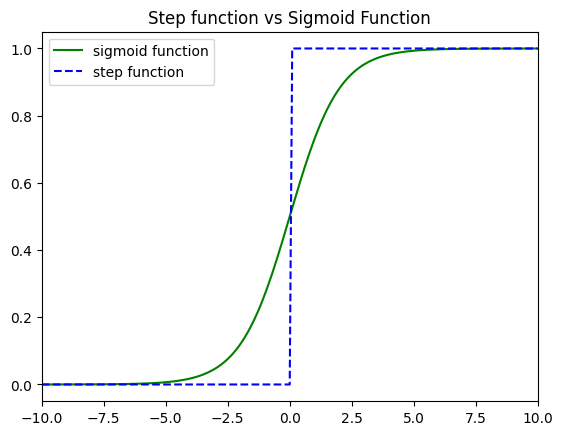

In [10]:
import math
from matplotlib import pyplot as plt

def sigmoid(t: float) -> float:
    return 1/(1+math.exp(-t))

# Plot sigmoid function

xs = [t/10 for t in range(-100, 101)]
ys = [sigmoid(x) for x in xs]
plt.plot(xs, ys, label = 'sigmoid function', color = 'green')
plt.xlim(-10, 10)

# Plot step function
ys2 = [1 if x > 0 else 0 for x in xs]
plt.plot(xs, ys2, linestyle='dashed', color = 'blue', label = 'step function')
plt.legend()
plt.title('Step function vs Sigmoid Function')

## Output
- Calculate output using sigmoid function
  $$ output = (weights) . (inputs)$$

In [11]:
def neuron_output(weights: Vector, inputs: Vector) -> float:
    # Weights include bias term and inputs include a 1
    return sigmoid(dot(weights, inputs))

weight = [-1,-2,3,4,5]
input = [7,8, -9, 10, 1]
neuron_output(weight, input) # between 0 to 1

0.0066928509242848554

## Feed forward network
- Contains List of lists of Vectors.
- Example:
> - Input Layer: i features+1(bias) — Vector
> - Hidden Layer consists of Neurons: i.e. List[[weights]]. One neuron = one List[weight]
> - Neural Network: List[layered inputs]: List[List[weighted inputs]]: List[List[Vector]]
> - Output Layer: One neuron with weigted inputs passed from all layers i.e. List[weighted inputs]

![image](neurons.png)

In [12]:
from typing import List

def feed_forward(neural_netwrok: List[List[Vector]], 
                 input_vector: Vector) -> List[Vector]:
    """
    Feeds the input vector through the neural network.
    Returns the outputs of all layers (not just the last one).
    """
    outputs: List[Vector] = []

    for layer in neural_netwrok:
        input_with_bias = input_vector + [1]
        output = [neuron_output(neuron, input_with_bias) for neuron in layer]
        outputs.append(output)
        input_vector = output

    return outputs

In [13]:
input = [1,2]
l1 = [[2,3,4], [4,-5,6], [6,7,8]]
l2 = [[-4,5,6,1], [6,-7,-8,1], [2,-3,4,1]] # 3 inputs to l2 from 3 l1 outputs, therefore 4 weights(with bias weight)
# l3 = [[6,7,-8,1], [2,3,4,1], [4,5,6,1]]    # again 3 inputs to l3 from 
network_layers = [l1, l2]
feed_forward(network_layers, input)

[[0.9999938558253978, 0.5, 0.9999999999993086],
 [0.9959299619062818, 0.010986542053798634, 0.9959298124720847]]

## XOR gate using Neuronal Network
$$ A \otimes B = (A + B)(\bar{A} + \bar{B}) = (A+B)(\overline{A.B})$$

                  Inputs     o/p
                  0     0     0
                  0     1     1
                  1     0     1
                  1     1     0



- To create XOR gate we need one hidden layer and an output layer  
  Hidden Layer: 2 neurons - [[OR weights], [AND weights]]  
  Output Layer: [output1. $\overline{output2}$]  (outputs from hidden layer)

- One suggestive way of thinking about this is that the hidden layer is computing features of the input data (in this case “and” and “or”) and the output layer is combining those features in a way that generates the desired output.

- The weights are obtained from training the NN.

In [14]:
xor_network = [# hidden layer
    [[20.,20, -30],  # 'and' neuron
     [20., 20, -10]], # 'or' neuron
     #output layer
     [[-60., 60, -30]]] #(NOT('and') x 'or)

print(feed_forward(xor_network, [0, 0]))

# feed_forward returns the outputs of all layers, so the [-1] gets the
# final output, and the [0] gets the value out of the resulting vector
assert 0.000 < feed_forward(xor_network, [0, 0])[-1][0] < 0.001
assert 0.999 < feed_forward(xor_network, [1, 0])[-1][0] < 1.000
assert 0.999 < feed_forward(xor_network, [0, 1])[-1][0] < 1.000
assert 0.000 < feed_forward(xor_network, [1, 1])[-1][0] < 0.001

[[9.357622968839299e-14, 4.5397868702434395e-05], [9.38314668300676e-14]]


![image](XOR_NN.png) 

# 3. Backpropagation

- Core algorithm to train neural networks.
- Goal is to minimize output error (Loss function) by adjusting weights from different layers.
- Error minimization is done using gradient descent algorithm.
  
- The process of backpropagation involves -

1. Generate output
2. Find Loss function as MSE
3. Find gradient Loss function wrt neuron weights.
   > 1. First find gradient of last layer output Loss function
   > 2. Do Backpropagation: “Propagate” the gradients and errors backward to compute the gradients with respect to the hidden neurons’ waeights.
4. Weight Adjustment: Take a gradient descent step.
5.  Convergence: Run the algorithm until network converges.

In [15]:
# 1. Compute Gradients

def sqerror_gradients(network: List[List[Vector]],
                      input_vector: Vector,
                      target_vector: Vector) -> List[List[Vector]]:
    """
    Given a neural network, an input vector, and a target vector,
    make a prediction and compute the gradient of the squared error
    loss with respect to the neuron weights.
    """
    # forward pass
    hidden_outputs, outputs = feed_forward(network, input_vector)

    # gradients wrt output neuron pre-actiavtion outputs
    output_deltas = [output * (1 - output)* (output - target)
                     for output, target in zip(outputs, target_vector)]
    
    output_grads = [[output_deltas[i]*hidden_output 
                     for hidden_output in hidden_outputs +[1]] 
                    for i, output_neuron in enumerate(network[-1])]

    # gradients wrt hidden neuron pre-activation outputs
    hidden_deltas = [hidden_output * (1 - hidden_output) * dot(output_deltas, [n[i] for n in network[-1]])
                     for i, hidden_output in enumerate(hidden_outputs)]

    # gradients with respect to hidden neuron weights
    hidden_grads = [[hidden_deltas[i] * input
                     for input in input_vector + [1]]
                    for i, hidden_neuron in enumerate(network[0])]
    
    return [hidden_grads, output_grads]



# Generate training data

import random
random.seed(0)
# training data
xs = [[0., 0], [0., 1], [1., 0], [1., 1]]
ys = [[0.], [1.], [1.], [0.]]

# Initialize Random weights

network = [ # hidden layer: 2 inputs -> 2 outputs
    [[random.random() for _ in range(2 + 1)], # 1st hidden neuron
     [random.random() for _ in range(2 + 1)]], # 2nd hidden neuron
    # output layer: 2 inputs -> 1 output
    [[random.random() for _ in range(2 + 1)]] # 1st output neuron
]

for x, y in zip(xs,ys):
    print(x, y)

[0.0, 0] [0.0]
[0.0, 1] [1.0]
[1.0, 0] [1.0]
[1.0, 1] [0.0]


In [16]:
# Use gradient descent to optimize weights

from scratch.gradient_descent import gradient_step
import tqdm

learning_rate = 1.0

with tqdm.trange(20000, desc = "neural network for XOR") as pbar:
    for epoch in pbar:
        for x,y in zip(xs,ys):
            # print(x)
            gradients = sqerror_gradients(network, x, y)
            #gradient step for each neuron in each layer
            network = [[gradient_step(neuron, grad, -learning_rate)
                for neuron, grad in zip(layer, layer_grad)] 
                 for layer, layer_grad in zip(network, gradients)]
            # pbar.set_description(f"{epoch} {x}")
print(network)
feed_forward(network, [1, 0])[-1]

neural network for XOR: 100%|██████████| 20000/20000 [00:00<00:00, 37320.67it/s]

[[[6.953505610104289, 6.952785792366962, -3.1484761965046655], [5.115899442661922, 5.115407875835949, -7.839603434415663]], [[10.961705832630562, -11.63060534664317, -5.144229056613082]]]


[0.9923280275107558]

# 4. Example: Fizz Buzz

Fizz Buzz problem
>- Print the numbers 1 to 100, except that if the number is divisible by 3, print "fizz";
>- if the number is divisible by 5, print "buzz";
>- and if the number is divisible by 15, print "fizzbuzz".

## 1. Normal solution using Python:

In [17]:
for i in range(1, 101):
    if i % 15 == 0:
        print('fizzbuzz')
    elif i % 5 == 0:
        print('buzz')
    elif i % 3 == 0:
        print('fizz')
    else:
        print(i)

1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz
16
17
fizz
19
buzz
fizz
22
23
fizz
buzz
26
fizz
28
29
fizzbuzz
31
32
fizz
34
buzz
fizz
37
38
fizz
buzz
41
fizz
43
44
fizzbuzz
46
47
fizz
49
buzz
fizz
52
53
fizz
buzz
56
fizz
58
59
fizzbuzz
61
62
fizz
64
buzz
fizz
67
68
fizz
buzz
71
fizz
73
74
fizzbuzz
76
77
fizz
79
buzz
fizz
82
83
fizz
buzz
86
fizz
88
89
fizzbuzz
91
92
fizz
94
buzz
fizz
97
98
fizz
buzz


## 2. Using Machine Learning
- We want to train a NN to learn fizzbuzz rule and generate appropriate output.

In [18]:
# input encoding
from typing import List
Vector = List[float]
def binary_encode(x: int) -> Vector:
    binary: List[float] = []

    for i in range(10):
        binary.append(x%2)
        x = x//2 # Divide

    return binary

binary_encode(15)

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

In [19]:
# output decoding

def fizz_buzz_encode(x: int) -> Vector:
    if x % 15 == 0:
        return [0, 0, 0, 1]
    elif x % 5 == 0:
        return [0, 0, 1, 0]
    elif x % 3 == 0:
        return [0, 1, 0, 0]
    else:
        return [1, 0, 0, 0]

assert fizz_buzz_encode(2) == [1, 0, 0, 0]
assert fizz_buzz_encode(6) == [0, 1, 0, 0]
assert fizz_buzz_encode(10) == [0, 0, 1, 0]
assert fizz_buzz_encode(30) == [0, 0, 0, 1]

In [20]:
# training data

xs = [binary_encode(n) for n in range(101, 1024)]
ys = [fizz_buzz_encode(n) for n in range(101, 1024)]


In [21]:
# Define Network
# Initialize random weights

import random

random.seed(0)
Num_hidden_neurons = 25

network = [# one hidden layer with Num_hidden_neurons with 10 weights each
    [[random.random() for _ in range(10+1)] for _ in range(Num_hidden_neurons)],

    # one output layer with number_of_inputs = Num_hidden_neurons
    # number_of_outputs = 4
    [[random.random() for _ in range(Num_hidden_neurons+1)] for _ in range(4)]
]
assert len(network) == 2
assert len(network[0]) == 25
assert len(network[1]) == 4
assert len(network[0][0]) == 11
assert len(network[1][0]) == 26

In [26]:
# Gradient Descent
import tqdm

from scratch.linear_algebra import squared_distance

leraning_rate = 1.0

with tqdm.trange(500) as t:
    for epoch in t:
        epoch_loss = 0
        for x, y in zip(xs, ys):
            predicted = feed_forward(network, x)[-1]
            epoch_loss +=squared_distance(predicted, y)
            gradients = sqerror_gradients(network, x, y)
            network = [[gradient_step(neuron, grad, -learning_rate) 
                        for neuron, grad in zip(layer, layer_grad)] 
                       for layer, layer_grad in zip(network, gradients)]


        t.set_description(f"fizz buzz (loss: {epoch_loss:.2f})")

fizz buzz (loss: 25.60): 100%|████████████████| 500/500 [00:52<00:00,  9.58it/s]


In [28]:
def argmax(xs: list) -> int:
    """Returns the index of the largest value"""
    return max(range(len(xs)), key=lambda i: xs[i])

assert argmax([0, -1]) == 0 # items[0] is largest
assert argmax([-1, 0]) == 1 # items[1] is largest
assert argmax([-1, 10, 5, 20, -3]) == 3 # items[3] is largest

In [29]:
num_correct = 0

for n in range(1, 101):
    x = binary_encode(n)
    predicted = argmax(feed_forward(network, x)[-1])
    actual = argmax(fizz_buzz_encode(n))
    labels = [str(n), "fizz", "buzz", "fizzbuzz"]
    print(n, labels[predicted], labels[actual])
    if predicted == actual:
        num_correct += 1

print(num_correct, "/", 100)

1 1 1
2 2 2
3 fizz fizz
4 buzz 4
5 buzz buzz
6 fizz fizz
7 7 7
8 8 8
9 fizz fizz
10 buzz buzz
11 11 11
12 fizz fizz
13 13 13
14 14 14
15 fizzbuzz fizzbuzz
16 16 16
17 17 17
18 fizz fizz
19 19 19
20 buzz buzz
21 fizz fizz
22 22 22
23 23 23
24 fizz fizz
25 buzz buzz
26 26 26
27 fizz fizz
28 28 28
29 29 29
30 fizzbuzz fizzbuzz
31 31 31
32 32 32
33 fizz fizz
34 34 34
35 buzz buzz
36 fizz fizz
37 37 37
38 38 38
39 fizz fizz
40 buzz buzz
41 41 41
42 fizz fizz
43 43 43
44 44 44
45 fizzbuzz fizzbuzz
46 46 46
47 47 47
48 fizz fizz
49 49 49
50 buzz buzz
51 fizz fizz
52 52 52
53 53 53
54 fizz fizz
55 buzz buzz
56 56 56
57 fizz fizz
58 58 58
59 59 59
60 fizzbuzz fizzbuzz
61 61 61
62 62 62
63 fizz fizz
64 buzz 64
65 buzz buzz
66 fizz fizz
67 67 67
68 68 68
69 fizz fizz
70 70 buzz
71 71 71
72 fizz fizz
73 73 73
74 74 74
75 fizzbuzz fizzbuzz
76 76 76
77 77 77
78 fizz fizz
79 79 79
80 buzz buzz
81 fizz fizz
82 82 82
83 83 83
84 fizz fizz
85 buzz buzz
86 86 86
87 fizz fizz
88 88 88
89 89 89
90 fizzbuzz